In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
plt.rc('figure',figsize=(8,7))

C:\Users\Mohit\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('pima-indians-diabetes.csv',names=['preg','plas','pres','skin','test','mass', 'pedi', 'age', 'class'])
data.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [4]:
X = data.iloc[:,:8]
y = data.iloc[:,-1:]

# Visualization

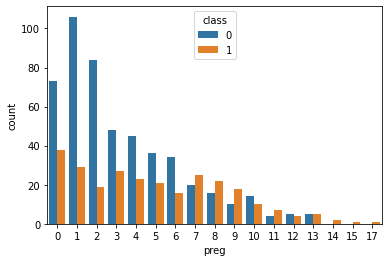

In [5]:
sns.countplot(x = 'preg',hue='class', data=data)

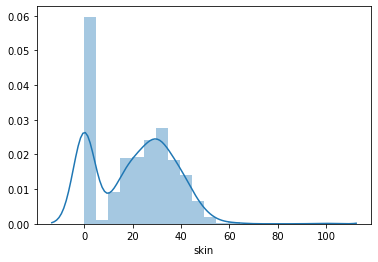

In [6]:
sns.distplot(data['skin'],bins=20)

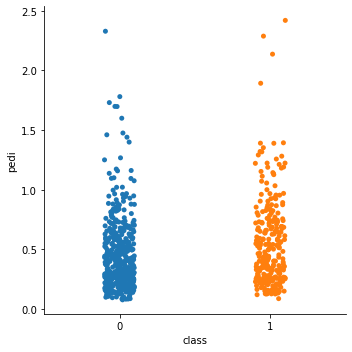

In [7]:
sns.catplot(x='class',y='pedi',data=data)

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()
norm_scaler = MinMaxScaler()

In [8]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [22]:
X_train_norm.min(),X_train_norm.max()  # normalized data 

(0.0, 1.0)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,f1_score

In [84]:
rf = KNeighborsClassifier()
rf.fit(X_train_norm,y_train)

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
pred= rf.predict(X_test_norm)

In [86]:
acc = accuracy_score(y_test,pred)
acc

0.6818181818181818

In [87]:
f1 = f1_score(y_test, pred)
f1

0.5420560747663552

In [88]:
rc = recall_score(y_test, pred)
rc

0.5272727272727272